<a href="https://colab.research.google.com/github/CarlosOX/SemanaTec/blob/main/08_2_actividad_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Regresión Lineal

* **Nombre:** Carlos Eduardo Ortega Clement 
* **Matrícula:** A01707480

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio. <br>
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite. <br>
**Importante**:
  * Colocar nombres de ejes en gráficas.
  * Títulos en las gráficas.
  * Contestar cada pregunta.

Carga el conjunto de datos `presion.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [11]:
# Carga las librerías necesarias.

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from google.colab import files

from sklearn.linear_model import LinearRegression
import pandas as pd


In [6]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
df = pd.read_csv('presion.csv')
df.head(6)

Saving presion.csv to presion (2).csv
User uploaded file "presion.csv" with length 772 bytes


,Age,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406


El conjunto de datos contiene información demográfica sobre los asegurados en una compañía de seguros:
* **Age**: Edad de la persona.
* **Average of ap_hi**: Promedio de presión alta.
* **Average of ap_lo**: Promedio de presión baja.

<Axes: xlabel='Age', ylabel='Average of ap_hi'>

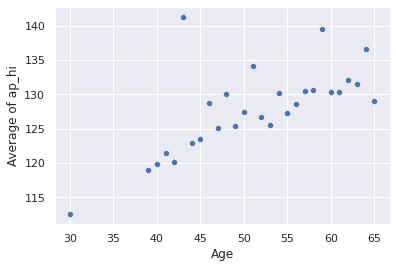

In [8]:
# Grafica la información de la edad y presión alta
sns.scatterplot(data=df, x='Age', y='Average of ap_hi')

Genera una regresión líneal para obtener una aproximación de la ecuación 
$$ y = ax + b $$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**, tanto para presión alta como la presión baja.

In [34]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?

x = df['Age']
y = df['Average of ap_hi']

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

print()
print()
print()
print('Coeficientes a: ', model.coef_)
print('Coeficiente b (intersección): ', model.intercept_)
print()
print()
print()






Coeficientes a:  [0.47769703]
Coeficiente b (intersección):  103.3969740964366





<ipython-input-34-6f026c5f188a>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


In [41]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?

X = df['Age']
Y = df['Average of ap_lo']

model2 = LinearRegression(fit_intercept=True)

model2.fit(X[:, np.newaxis], Y)


print()
print()
print()
print('Coeficientes a: ', model2.coef_)
print('Coeficiente b (intersección): ', model2.intercept_)
print()
print()
print()






Coeficientes a:  [0.60898106]
Coeficiente b (intersección):  63.726200409422745





<ipython-input-41-b63dbabc7bd2>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model2.fit(X[:, np.newaxis], Y)


Gráfica los datos reales contra los obtenidos con el modelo. Se debe visualizar los datos reales (azúl), recta del modelo (negro)y distancias entre ambos. (verde) 

<ipython-input-38-eddde9788a07>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="green");


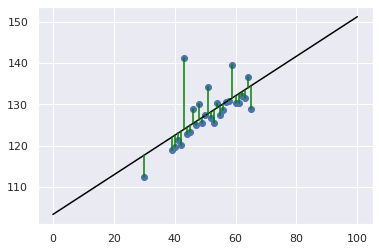

In [38]:
# Presión alta
xfit = np.linspace(0, 100, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color="black");
#plt.plot(x, y, 'b')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="green");


<ipython-input-40-7fb4bf3002f8>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(np.vstack([X,X]), np.vstack([Y, model2.predict(X[:, np.newaxis])]), color="green");


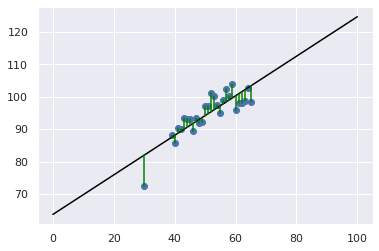

In [40]:
# Presión baja


Xfit = np.linspace(0, 100, 1000)
Yfit = model2.predict(Xfit[:, np.newaxis])

plt.scatter(X, Y)
plt.plot(Xfit, Yfit, color="black");
#plt.plot(X, Y, 'b')
plt.plot(np.vstack([X,X]), np.vstack([Y, model2.predict(X[:, np.newaxis])]), color="green");



¿Cual es la presión arterial atal y baja para una persona de cierta edad? Genera dos funciones que calculen los anterior.

In [42]:
def pressure_low(age):
  return model2.predict([[age]])[0]

query_age= 76
pressure_low(query_age)

110.00876081923334

In [43]:
def pressure_high(age):
  return model.predict([[age]])[0]

query_age= 76
pressure_high(query_age)

139.70194835946515